Correlation Analysis:

In [ ]:
import pandas as pd

import pandas_datareader as webreader
!pip install datetime
import datetime 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn

: 

In [2]:
indices=['^NDX','NSE']

In [3]:
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2023,5,1)

In [4]:
df = pd.DataFrame()
for index in indices:
    df_tmp = yf.download(indice,start,end)
    df_tmp['Index'] = index
    df=pd.concat([df,df_tmp])
df=df.reset_index()
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Indice
0,2010-01-04,1882.689941,1890.020020,1881.630005,1886.699951,1886.699951,1931380000,^NDX
1,2010-01-05,1887.280029,1891.329956,1877.520020,1888.430054,1888.430054,2367860000,^NDX
2,2010-01-06,1887.910034,1893.209961,1873.900024,1878.420044,1878.420044,2253340000,^NDX
3,2010-01-07,1878.160034,1881.329956,1867.619995,1876.719971,1876.719971,2270050000,^NDX
4,2010-01-08,1870.900024,1893.250000,1868.550049,1892.589966,1892.589966,2145390000,^NDX
...,...,...,...,...,...,...,...,...
5170,2022-02-24,7.940000,7.940000,7.940000,7.940000,7.940000,14000,NSE
5171,2022-02-25,7.800000,7.800000,7.800000,7.800000,7.800000,11600,NSE
5172,2022-02-28,7.780000,7.780000,7.780000,7.780000,7.780000,44400,NSE
5173,2022-03-01,7.780000,7.780000,7.780000,7.780000,7.780000,29800,NSE


In [5]:
corr_df = df.corr(method='pearson')
corr_df.head().reset_index()
corr_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999951,0.999928,0.999865,0.999865,0.905548
High,0.999951,1.000000,0.999907,0.999928,0.999928,0.906353
Low,0.999928,0.999907,1.000000,0.999934,0.999934,0.904502
Close,0.999865,0.999928,0.999934,1.000000,1.000000,0.905390
Adj Close,0.999865,0.999928,0.999934,1.000000,1.000000,0.905390
Volume,0.905548,0.906353,0.904502,0.905390,0.905390,1.000000


<Figure size 432x288 with 0 Axes>

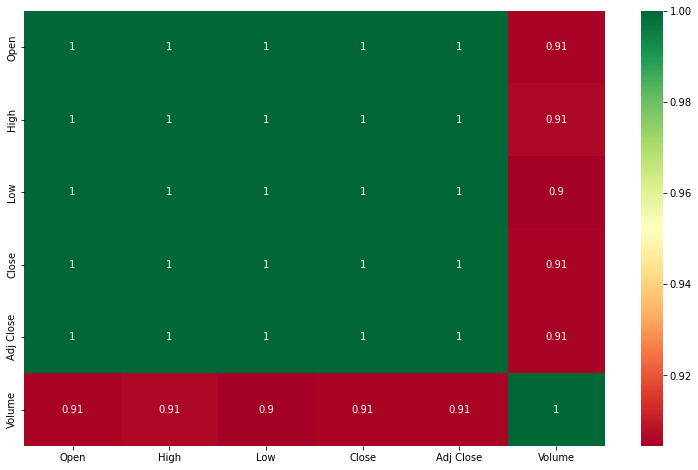

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(13, 8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

Risk management: Correlation analysis can help traders identify and manage risk by highlighting indices that tend to
move together. since the avode indices are highly correlated, traders can adjust their positions and hedge against potential losses.

Trading strategies: Traders can use the correlation matrix to develop and validate trading strategies. 
since the above two indices are highly correlated indices, expecting that the spread between their prices will converge or diverge. By identifying such pairs, traders can potentially profit from temporary price discrepancies.

In [13]:
time_lag = 3

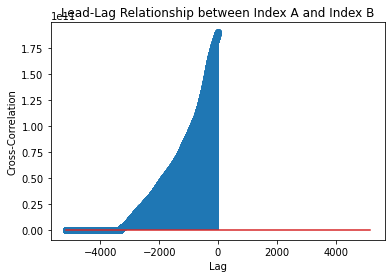

In [14]:
dataA_shifted = df['Close'].shift(-time_lag) 
dataB_aligned = df['Close']

cross_corr = np.correlate(dataA_shifted, dataB_aligned, mode='full')

lags = np.arange(-len(dataA_shifted) + 1, len(dataA_shifted))
plt.stem(lags, cross_corr)
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.title('Lead-Lag Relationship between Index A and Index B')
plt.show()

In [15]:
def calculate_cross_correlation(dataA, dataB):
    cross_corr = np.correlate(dataA, dataB, mode='full')
    return cross_corr
def identify_significant_lags(cross_corr, threshold):
    significant_lags = np.where(np.abs(cross_corr) > threshold)[0]
    return significant_lags
def assess_consistency(significant_lags):
    if len(significant_lags) > 0:
        lag_diffs = np.diff(significant_lags)
        consistent_lags = np.where(lag_diffs == lag_diffs[0])[0]
        if len(consistent_lags) == len(lag_diffs) - 1:
            return True
    return False

In [25]:
dfA = yf.download('^NDX',start,end)
dfA['Index'] = "^NDX"
     
dfB = yf.download('NSE',start,end)
dfB['Index'] = "NSE"  
threshold = 0.5  
dataA = dfA['Close'].values  
dataB = dfB['Close'].values  

cross_corr = calculate_cross_correlation(dataA, dataB)
significant_lags = identify_significant_lags(cross_corr, threshold)
is_consistent = assess_consistency(significant_lags)

if is_consistent:
    print("There is consistent leading or lagging behavior between the two indices.")
else:
    print("There is no consistent leading or lagging behavior between the two indices.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
There is no consistent leading or lagging behavior between the two indices.


Used the lead-lag relationship and used Close as the index to be used for parameter optimization.


Why Close->
It represents the final traded price of an asset at the end of a trading session. Traders and analysts often analyze the closing price because it captures the market sentiment and incorporates all the information and trading activity that occurred during the day.
However, the choice of indicator depends on the specific analysis or research question at hand. Different indicators can provide different insights into the relationship between two indices. For example, we might choose to use the opening price, high price, low price, volume, or even calculated technical indicators like moving averages or relative strength index (RSI) as indicators for our analysis.

Indicator Coding:

In [32]:
!pip install ta


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=499e42c6bf740e945768811f913ecf335e40b53a316c6db886c097108b37fb41
  Stored in directory: c:\users\ayush\appdata\local\pip\cache\wheels\6a\76\03\7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta


In [36]:

import ta

df['KC_MIDDLE'] = ta.volatility.bollinger_mavg(df['Close'], window=20)
df['KC_UPPER'] = df['KC_MIDDLE'] + (2 * ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=10))
df['KC_LOWER'] = df['KC_MIDDLE'] - (2 * ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=10))

df['BB_MIDDLE'] = ta.volatility.bollinger_mavg(df['Close'], window=20)
df['BB_UPPER'] = ta.volatility.bollinger_hband(df['Close'], window=20)
df['BB_LOWER'] = ta.volatility.bollinger_lband(df['Close'], window=20)

df['MACD'] = ta.trend.macd(df['Close'])
df['MACD_Signal'] = ta.trend.macd_signal(df['Close'])
df['MACD_Histogram'] = ta.trend.macd_diff(df['Close'])

print(df)


           Date         Open         High          Low        Close  \
0    2010-01-04  1882.689941  1890.020020  1881.630005  1886.699951   
1    2010-01-05  1887.280029  1891.329956  1877.520020  1888.430054   
2    2010-01-06  1887.910034  1893.209961  1873.900024  1878.420044   
3    2010-01-07  1878.160034  1881.329956  1867.619995  1876.719971   
4    2010-01-08  1870.900024  1893.250000  1868.550049  1892.589966   
...         ...          ...          ...          ...          ...   
5170 2022-02-24     7.940000     7.940000     7.940000     7.940000   
5171 2022-02-25     7.800000     7.800000     7.800000     7.800000   
5172 2022-02-28     7.780000     7.780000     7.780000     7.780000   
5173 2022-03-01     7.780000     7.780000     7.780000     7.780000   
5174 2022-03-02     7.800000     7.800000     7.800000     7.800000   

        Adj Close      Volume Indice  KC_MIDDLE   KC_UPPER   KC_LOWER  \
0     1886.699951  1931380000   ^NDX        NaN        NaN        NaN   
1

Parameter Optimization

In [37]:
!pip install optuna
import ta
import optuna

def objective(trial):
    
    keltner_window = trial.suggest_int('keltner_window', 10, 50)
    atr_window = trial.suggest_int('atr_window', 5, 20)
    bb_window = trial.suggest_int('bb_window', 10, 50)

    kc_middle = ta.volatility.bollinger_mavg(df['Close'], window=keltner_window)
    kc_upper = kc_middle + (2 * ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=atr_window))
    kc_lower = kc_middle - (2 * ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=atr_window))
   
    bb_middle = ta.volatility.bollinger_mavg(df['Close'], window=bb_window)
    bb_upper = ta.volatility.bollinger_hband(df['Close'], window=bb_window)
    bb_lower = ta.volatility.bollinger_lband(df['Close'], window=bb_window)
    
    returns = df['Close'].pct_change() 
    trades = ((df['Close'] < kc_lower) & (df['Close'].shift(1) > kc_lower.shift(1))) | ((df['Close'] > kc_upper) & (df['Close'].shift(1) < kc_upper.shift(1)))
    strategy_returns = returns * trades  
    metric = strategy_returns.mean() 
    
    return -metric

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
print("Best Hyperparameters:", best_params)


     ------------------------------------ 390.6/390.6 kB 468.4 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 823.5 kB/s eta 0:00:00
     ------------------------------------ 224.5/224.5 kB 978.5 kB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 1.1 MB/s eta 0:00:00
     ------------------------------------ 192.1/192.1 kB 612.2 kB/s eta 0:00:00


[I 2023-06-08 00:32:03,161] A new study created in memory with name: no-name-985c0d14-a2b2-4367-af01-5a29d480784d
[I 2023-06-08 00:32:03,298] Trial 0 finished with value: 0.000619064183784056 and parameters: {'keltner_window': 16, 'atr_window': 20, 'bb_window': 25}. Best is trial 0 with value: 0.000619064183784056.
[I 2023-06-08 00:32:03,433] Trial 1 finished with value: 0.0005464462141761272 and parameters: {'keltner_window': 10, 'atr_window': 16, 'bb_window': 48}. Best is trial 0 with value: 0.000619064183784056.
[I 2023-06-08 00:32:03,566] Trial 2 finished with value: 0.0006376878166917656 and parameters: {'keltner_window': 39, 'atr_window': 14, 'bb_window': 48}. Best is trial 2 with value: 0.0006376878166917656.
[I 2023-06-08 00:32:03,700] Trial 3 finished with value: 0.0005660580012065639 and parameters: {'keltner_window': 28, 'atr_window': 6, 'bb_window': 16}. Best is trial 2 with value: 0.0006376878166917656.
[I 2023-06-08 00:32:03,841] Trial 4 finished with value: 0.00052412950

[I 2023-06-08 00:32:09,648] Trial 40 finished with value: 0.0006270214090151198 and parameters: {'keltner_window': 35, 'atr_window': 15, 'bb_window': 31}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:09,825] Trial 41 finished with value: 0.000687551930834371 and parameters: {'keltner_window': 41, 'atr_window': 18, 'bb_window': 26}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:09,998] Trial 42 finished with value: 0.0006136868429816728 and parameters: {'keltner_window': 48, 'atr_window': 18, 'bb_window': 21}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:10,172] Trial 43 finished with value: 0.0006771892817726206 and parameters: {'keltner_window': 39, 'atr_window': 16, 'bb_window': 26}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:10,345] Trial 44 finished with value: 0.0006845482752236085 and parameters: {'keltner_window': 42, 'atr_window': 17, 'bb_window': 17}. Best is trial 23 w

[I 2023-06-08 00:32:17,621] Trial 80 finished with value: 0.0006638093406152538 and parameters: {'keltner_window': 40, 'atr_window': 19, 'bb_window': 20}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:17,872] Trial 81 finished with value: 0.0007036102560269107 and parameters: {'keltner_window': 42, 'atr_window': 18, 'bb_window': 25}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:18,170] Trial 82 finished with value: 0.0007036102560269107 and parameters: {'keltner_window': 42, 'atr_window': 18, 'bb_window': 22}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:18,404] Trial 83 finished with value: 0.0006664993095352232 and parameters: {'keltner_window': 45, 'atr_window': 18, 'bb_window': 22}. Best is trial 23 with value: 0.0007036102560269107.
[I 2023-06-08 00:32:18,620] Trial 84 finished with value: 0.0006990462623929629 and parameters: {'keltner_window': 40, 'atr_window': 17, 'bb_window': 19}. Best is trial 23 

Best Hyperparameters: {'keltner_window': 42, 'atr_window': 18, 'bb_window': 17}


Signal Generation:

In [39]:

keltner_window = 42
atr_window = 18
bb_window = 17

kc_middle_dfA = ta.volatility.bollinger_mavg(dfA['Close'], window=keltner_window)
kc_upper_dfA = kc_middle_dfA + (2 * ta.volatility.average_true_range(dfA['High'], dfA['Low'], dfA['Close'], window=atr_window))
kc_lower_dfA = kc_middle_dfA - (2 * ta.volatility.average_true_range(dfA['High'], dfA['Low'], dfA['Close'], window=atr_window))

bb_middle_dfA = ta.volatility.bollinger_mavg(dfA['Close'], window=bb_window)
bb_upper_dfA = ta.volatility.bollinger_hband(dfA['Close'], window=bb_window)
bb_lower_dfA = ta.volatility.bollinger_lband(dfA['Close'], window=bb_window)

dfB['KC_MIDDLE'] = kc_middle_dfA
dfB['KC_UPPER'] = kc_upper_dfA
dfB['KC_LOWER'] = kc_lower_dfA

dfB['BB_MIDDLE'] = bb_middle_dfA
dfB['BB_UPPER'] = bb_upper_dfA
dfB['BB_LOWER'] = bb_lower_dfA

print(dfB)


             Open   High    Low  Close  Adj Close  Volume Index     KC_MIDDLE  \
Date                                                                            
2014-11-14  21.00  21.00  21.00  21.00      21.00       0   NSE   4037.034308   
2014-11-17  21.00  21.00  21.00  21.00      21.00       0   NSE   4039.670259   
2014-11-18  21.00  21.00  21.00  21.00      21.00       0   NSE   4043.053595   
2014-11-19  21.00  21.00  21.00  21.00      21.00       0   NSE   4046.897170   
2014-11-20  21.00  21.00  21.00  21.00      21.00       0   NSE   4051.433355   
...           ...    ...    ...    ...        ...     ...   ...           ...   
2022-02-24   7.94   7.94   7.94   7.94       7.94   14000   NSE  15051.411668   
2022-02-25   7.80   7.80   7.80   7.80       7.80   11600   NSE  14994.784528   
2022-02-28   7.78   7.78   7.78   7.78       7.78   44400   NSE  14941.192848   
2022-03-01   7.78   7.78   7.78   7.78       7.78   29800   NSE  14882.025716   
2022-03-02   7.80   7.80   7

In [42]:

keltner_window = 42
atr_window = 18
bb_window = 17

kc_middle = ta.volatility.bollinger_mavg(df['Close'], window=keltner_window)
kc_upper = kc_middle + (2 * ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=atr_window))
kc_lower = kc_middle - (2 * ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=atr_window))

bb_middle = ta.volatility.bollinger_mavg(df['Close'], window=bb_window)
bb_upper = ta.volatility.bollinger_hband(df['Close'], window=bb_window)
bb_lower = ta.volatility.bollinger_lband(df['Close'], window=bb_window)

# Generating buy and sell signals
df['Buy_Signal'] = (df['Close'] > kc_upper.shift(1)) & (df['Close'].shift(1) < kc_upper.shift(1)) | (df['Close'] < bb_lower.shift(1)) & (df['Close'].shift(1) > bb_lower.shift(1))
df['Sell_Signal'] = (df['Close'] < kc_lower.shift(1)) & (df['Close'].shift(1) > kc_lower.shift(1)) | (df['Close'] > bb_upper.shift(1)) & (df['Close'].shift(1) < bb_upper.shift(1))

print(df)


           Date         Open         High          Low        Close  \
0    2010-01-04  1882.689941  1890.020020  1881.630005  1886.699951   
1    2010-01-05  1887.280029  1891.329956  1877.520020  1888.430054   
2    2010-01-06  1887.910034  1893.209961  1873.900024  1878.420044   
3    2010-01-07  1878.160034  1881.329956  1867.619995  1876.719971   
4    2010-01-08  1870.900024  1893.250000  1868.550049  1892.589966   
...         ...          ...          ...          ...          ...   
5170 2022-02-24     7.940000     7.940000     7.940000     7.940000   
5171 2022-02-25     7.800000     7.800000     7.800000     7.800000   
5172 2022-02-28     7.780000     7.780000     7.780000     7.780000   
5173 2022-03-01     7.780000     7.780000     7.780000     7.780000   
5174 2022-03-02     7.800000     7.800000     7.800000     7.800000   

        Adj Close      Volume Indice  KC_MIDDLE   KC_UPPER   KC_LOWER  \
0     1886.699951  1931380000   ^NDX        NaN        NaN        NaN   
1

In [53]:
df['macd_signal'] = np.where(df['macd'] > 0, 1, -1)
df['macd_return'] = df['macd_signal'] * df['return']

df['bb_signal'] = np.where(df['Close'] > df['upper_band'], -1, np.where(df['Close'] < df['lower_band'], 1, 0))
df['bb_return'] = df['bb_signal'] * df['return']

df['kc_signal'] = np.where(df['Close'] > df['kc_upper'], -1, np.where(df['Close'] < df['kc_lower'], 1, 0))
df['kc_return'] = df['kc_signal'] * df['return']

In [55]:
macd_cumulative_return = (1 + df['macd_return']).cumprod().iloc[-1]
bb_cumulative_return = (1 + df['bb_return']).cumprod().iloc[-1]
kc_cumulative_return = (1 + df['kc_return']).cumprod().iloc[-1]

In [56]:
macd_cumulative_returns = (1 + df['macd_return']).cumprod()
macd_rolling_max = macd_cumulative_returns.cummax()
macd_drawdown = (macd_cumulative_returns / macd_rolling_max) - 1
macd_max_drawdown = macd_drawdown.min()

bb_cumulative_returns = (1 + df['bb_return']).cumprod()
bb_rolling_max = bb_cumulative_returns.cummax()
bb_drawdown = (bb_cumulative_returns / bb_rolling_max) - 1
bb_max_drawdown = bb_drawdown.min()

kc_cumulative_returns = (1 + df['kc_return']).cumprod()
kc_rolling_max = kc_cumulative_returns.cummax()
kc_drawdown = (kc_cumulative_returns / kc_rolling_max) - 1
kc_max_drawdown = kc_drawdown.min()

In [57]:
risk_free_rate = 0.05  # Replace with the appropriate risk-free rate
macd_annualized_return = macd_cumulative_return ** (252 / len(df)) - 1
macd_annualized_volatility = np.std(df['macd_return']) * np.sqrt(252)
macd_sharpe_ratio = (macd_annualized_return - risk_free_rate) / macd_annualized_volatility

bb_annualized_return = bb_cumulative_return ** (252 / len(df)) - 1
bb_annualized_volatility = np.std(df['bb_return']) * np.sqrt(252)
bb_sharpe_ratio = (bb_annualized_return - risk_free_rate) / bb_annualized_volatility

kc_annualized_return = kc_cumulative_return ** (252 / len(df)) - 1
kc_annualized_volatility = np.std(df['kc_return']) * np.sqrt(252)
kc_sharpe_ratio = (kc_annualized_return - risk_free_rate) / kc_annualized_volatility


C:\Users\ayush\AppData\Local\Temp\ipykernel_23316\2722022066.py:2: RuntimeWarning: invalid value encountered in double_scalars
  macd_annualized_return = macd_cumulative_return ** (252 / len(df)) - 1


In [58]:
print("MACD Cumulative Return:", macd_cumulative_return)
print("MACD Max Drawdown:", macd_max_drawdown)
print("MACD Sharpe Ratio:", macd_sharpe_ratio)

print("Bollinger Bands Cumulative Return:", bb_cumulative_return)
print("Bollinger Bands Max Drawdown:", bb_max_drawdown)
print("Bollinger Bands Sharpe Ratio:", bb_sharpe_ratio)

print("Keltner Channels Cumulative Return:", kc_cumulative_return)
print("Keltner Channels Max Drawdown:", kc_max_drawdown)
print("Keltner Channels Sharpe Ratio:", kc_sharpe_ratio)

MACD Cumulative Return: -32606.529995286248
MACD Max Drawdown: -318.4468987815749
MACD Sharpe Ratio: nan
Bollinger Bands Cumulative Return: 2.8246423004621665e-10
Bollinger Bands Max Drawdown: -0.9999999997175357
Bollinger Bands Sharpe Ratio: -2.050501553904226
Keltner Channels Cumulative Return: 7.006259606609504e-10
Keltner Channels Max Drawdown: -0.9999999993135212
Keltner Channels Sharpe Ratio: -2.007269123388072
